## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14,10

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from sklearn.preprocessing import StandardScaler

## Reading data

In [2]:
df = pd.read_csv('diabetes.csv')
df.shape

(768, 9)

## Preprocessing of dataset

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Checking for null values

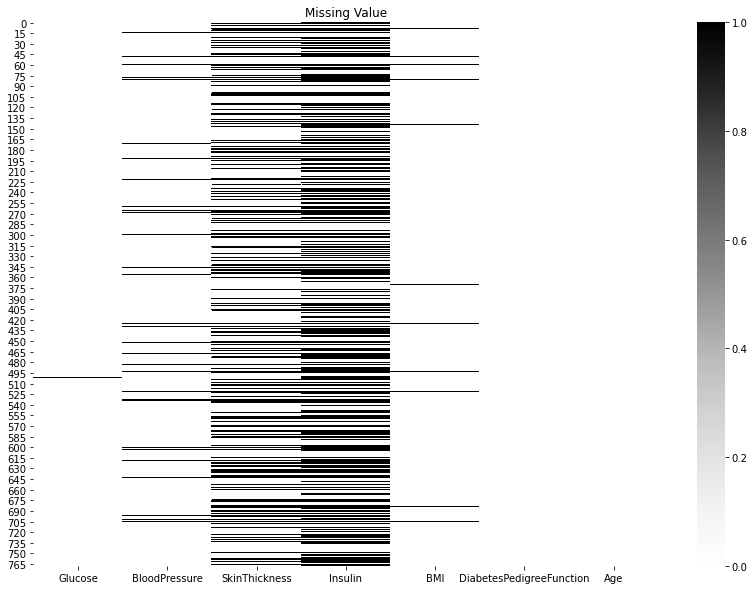

In [6]:
df_null = df.iloc[:,1:-1].replace(0, np.nan)

sns.heatmap(df_null.isnull(), cmap = 'Greys')
plt.title('Missing Value')
plt.show()

In [7]:
df = df[df['Insulin']!=0]

## Replacing null values with NaN

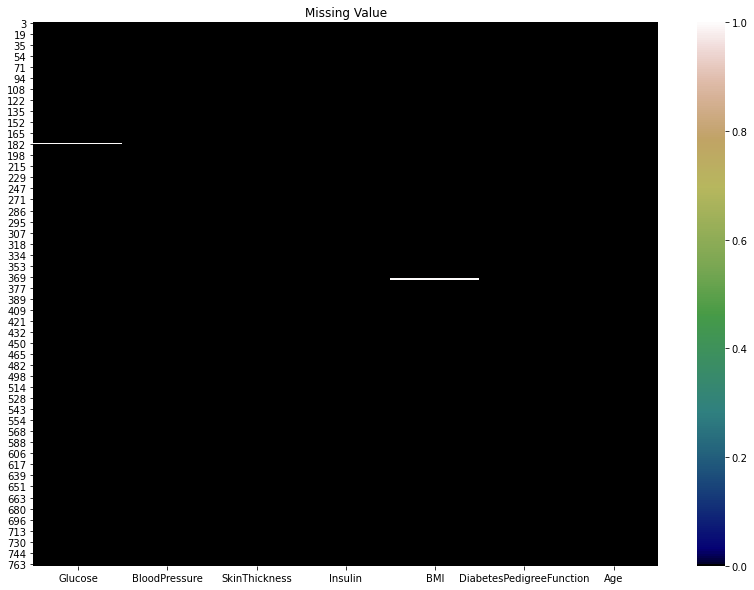

In [8]:
df_null = df.iloc[:,1:-1].replace(0, np.nan)

sns.heatmap(df_null.isnull(), cmap = 'gist_earth')
plt.title('Missing Value')
plt.show()

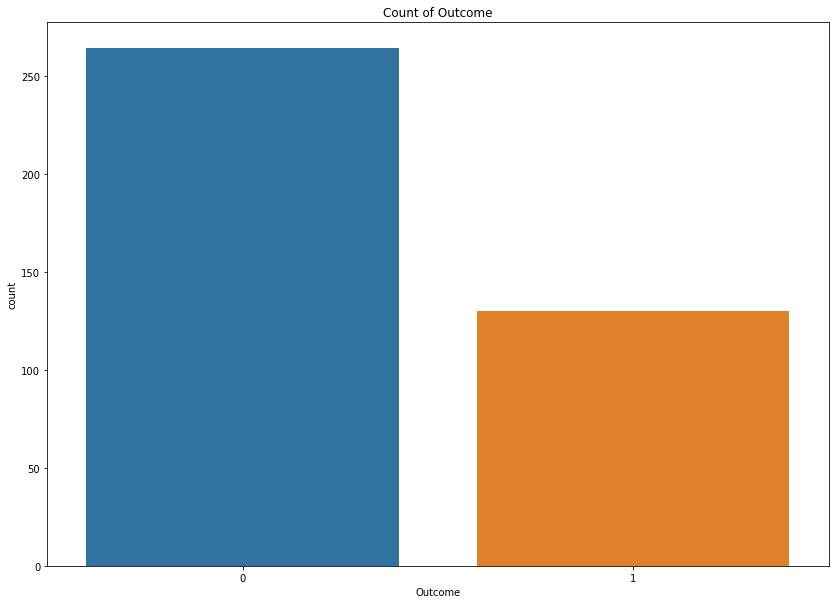

In [9]:
sns.countplot(df['Outcome'])

plt.title('Count of Outcome')
plt.show()

In [10]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape

((264, 9), (130, 9))

## Dropping the Class ('Outcome' column)

In [11]:
df = df.drop(['Outcome'], axis = 1)

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.286802,122.304569,70.654822,29.106599,155.548223,32.988579,0.525543,30.814721
std,3.209635,31.396725,12.469919,10.504273,118.775855,7.210160,0.350127,10.198971
min,0.000000,0.000000,24.000000,7.000000,14.000000,0.000000,0.085000,21.000000
25%,1.000000,99.000000,62.000000,21.000000,76.250000,28.325000,0.270250,23.000000
50%,2.000000,119.000000,70.000000,29.000000,125.000000,33.200000,0.449500,27.000000
75%,5.000000,143.000000,78.000000,36.750000,190.000000,37.075000,0.687000,36.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000


## LINEAR REGRESSION

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [14]:
X

array([[1.000e+00, 8.900e+01, 6.600e+01, ..., 9.400e+01, 2.810e+01,
        1.670e-01],
       [0.000e+00, 1.370e+02, 4.000e+01, ..., 1.680e+02, 4.310e+01,
        2.288e+00],
       [3.000e+00, 7.800e+01, 5.000e+01, ..., 8.800e+01, 3.100e+01,
        2.480e-01],
       ...,
       [2.000e+00, 8.800e+01, 5.800e+01, ..., 1.600e+01, 2.840e+01,
        7.660e-01],
       [1.000e+01, 1.010e+02, 7.600e+01, ..., 1.800e+02, 3.290e+01,
        1.710e-01],
       [5.000e+00, 1.210e+02, 7.200e+01, ..., 1.120e+02, 2.620e+01,
        2.450e-01]])

In [15]:
y

array([21, 33, 26, 53, 59, 51, 31, 33, 32, 27, 51, 41, 22, 57, 28, 22, 33,
       56, 26, 54, 22, 26, 30, 58, 42, 41, 31, 22, 24, 25, 27, 28, 26, 23,
       36, 27, 26, 43, 34, 42, 21, 40, 22, 23, 31, 24, 21, 37, 25, 24, 24,
       46, 23, 39, 21, 25, 23, 26, 30, 23, 40, 33, 30, 26, 31, 21, 22, 28,
       22, 23, 34, 24, 42, 23, 21, 23, 22, 47, 45, 27, 41, 29, 29, 23, 33,
       36, 26, 23, 21, 60, 33, 31, 25, 40, 29, 23, 26, 29, 27, 55, 57, 21,
       24, 36, 38, 25, 32, 21, 61, 26, 22, 31, 24, 46, 22, 23, 51, 22, 33,
       29, 23, 34, 24, 44, 24, 51, 34, 43, 21, 21, 25, 23, 22, 39, 37, 51,
       34, 29, 26, 33, 21, 25, 31, 24, 28, 29, 24, 46, 25, 35, 29, 47, 21,
       25, 30, 22, 27, 25, 26, 30, 28, 31, 43, 24, 30, 23, 37, 25, 22, 26,
       33, 22, 36, 49, 22, 26, 24, 28, 48, 29, 29, 30, 30, 22, 45, 25, 21,
       21, 25, 28, 58, 22, 22, 35, 24, 21, 25, 25, 24, 58, 28, 42, 21, 37,
       25, 39, 35, 26, 28, 25, 22, 21, 21, 22, 28, 26, 21, 21, 36, 31, 38,
       26, 43, 38, 22, 22

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [17]:
from sklearn.linear_model import SGDRegressor, LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)


LinearRegression()

In [18]:
#predicting the value
y_pred = lin_reg.predict(X_test)

In [19]:
r_squared = r2_score(y_test, y_pred)
print("r2_score is: ",r_squared)

r2_score is:  0.5214094865170262


## POLYNOMIAL REGRESSION

In [20]:
#SGD
from sklearn.linear_model import SGDRegressor, LinearRegression
regressor = SGDRegressor(max_iter=10000, tol=1e-4, alpha =0.01, random_state = 0, eta0 = 0.0001)
regressor.fit(X_train,y_train)

SGDRegressor(alpha=0.01, eta0=0.0001, max_iter=10000, random_state=0,
             tol=0.0001)

In [21]:
#predicting the value
y_pred1 = regressor.predict(X_test)
#r2 result
r_squared1 = r2_score(y_test, y_pred1)
print("Coefficient of Determination using sgd method= ",r_squared1)

Coefficient of Determination using sgd method=  -5850939835.465797


In [22]:
y_pred1

array([ -767467.97005457,  -176592.09818262, -1449976.56384366,
        -199863.66769274, -2029677.35036239,  -434492.0399594 ,
        -271819.8870606 ,  -795535.65787496,  -396979.82132044,
       -1049139.03082295, -1031791.61003805, -2460572.37081762,
        -264807.26364188,  -484960.88372043,  -593216.89659444,
        -199794.41939939, -1500120.69384472,  -454153.2685108 ,
       -1230227.53607575,  -472371.88005992,  -282218.92957929,
        -304893.12167898,  -798748.03185414,  -314361.60792484,
          15124.50892799, -1888612.81717231, -1437730.31575487,
       -1263657.67689244,  -286042.53474493,  -184701.94582706,
        -482052.09165955,  -745275.35597982,  -957596.57211222,
        -616242.92198381,   -34099.48839169,  -191234.3898475 ,
        -849758.66400861,  -457603.63876109, -2024077.06546898,
       -1587324.23168011, -1037910.71758448, -1523626.27609542,
        -695504.66656488,  -149499.31417252,  -416534.78147238,
        -825178.23090675,  -548152.59711

In [23]:
#converting the independent variables  with degree of polynomial 2
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train = poly_reg.fit_transform(X_train)
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)


from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_test = poly_reg.fit_transform(X_test)
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_test = sc_X.fit_transform(X_test)

In [24]:
#SGD
from sklearn.linear_model import SGDRegressor, LinearRegression
regressor = SGDRegressor(max_iter=10000, tol=1e-4, alpha =0.01, random_state = 0, eta0 = 0.0001)
regressor.fit(X_train, y_train)

SGDRegressor(alpha=0.01, eta0=0.0001, max_iter=10000, random_state=0,
             tol=0.0001)

In [25]:
#predicting the value
y_pred1 = regressor.predict(X_test)
#r2 result
from sklearn.metrics import r2_score
r_squared1 = r2_score(y_test[:2217], y_pred1[:len(y_test)])
print("Coefficient of Determination using sgd method= ",r_squared1)

Coefficient of Determination using sgd method=  0.5259082970645765
